<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-I/blob/main/sep_de_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Separacion de variables**

Use el método de separación de variables para resolver:

$$u_{t}(x,t)=u_{xx}(x,t)=0, \;\;\; 0<x<1,  \;\;\; t>0$$

$$u_{x}(0,t)=0, u_{x}(1,t)=0,\;\;\; t<0$$

$$u(x,0)= f(x) =x, \;\;\; 0<x<1$$


Para empezar graficamos la condición inicial

In [163]:
from pylab import *

In [164]:
def recta(x):
    return x

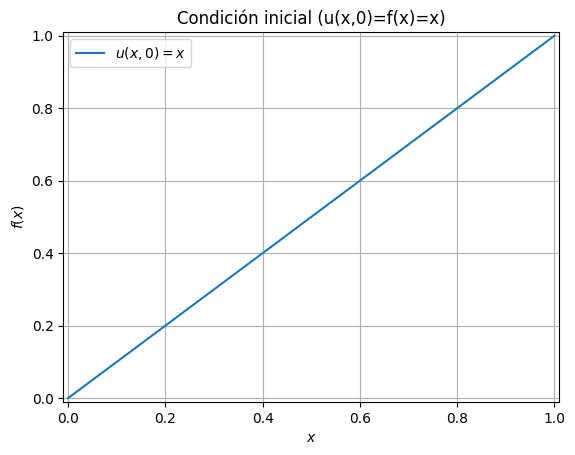

In [165]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x)=x)")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0) = f(x) = x$

In [166]:
def u_t(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        #m = 2*n +1
        f += ((2)*((-1)**n)-1)*cos(n*pi*x)/((n*pi)**2)
    return f + 1/2
#Solo que necesitamos saber si n es impar o par

In [167]:
#Para comparar si n es par o impar, necesitamos hacer un codigo if
def u_0(x,N=20):  # N es el número de armónicos
    f = np.zeros(len(x))
    for n in range(N+1):
        if n == 0:
            a_n = 0.5  #Ya que el termino constante es 1/2
        else:
            #Cuando es impar o par
            if n % 2 == 1:
                a_n = -4 / (n * np.pi)**2
            else:
                a_n = 0
        f += a_n * np.cos(n * np.pi * x)
    return f

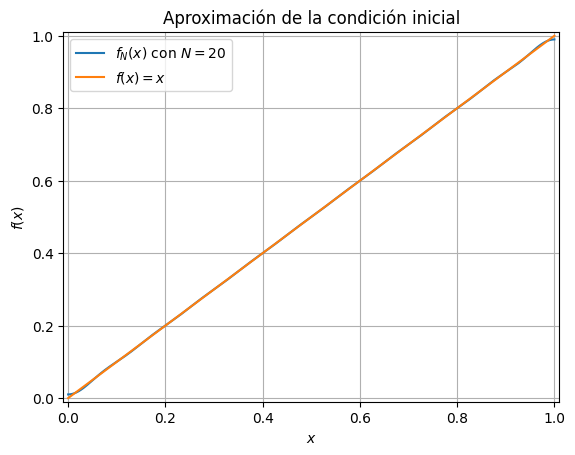

In [168]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

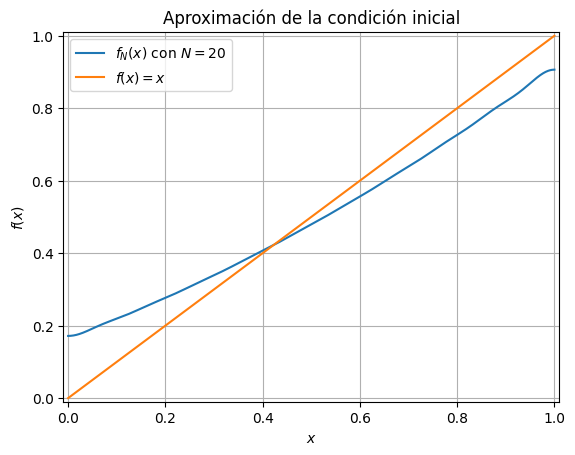

In [169]:
#Prueba con el codigo anterior, si no tuvieramos que checar si n es par o impar
f_n = u_t(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

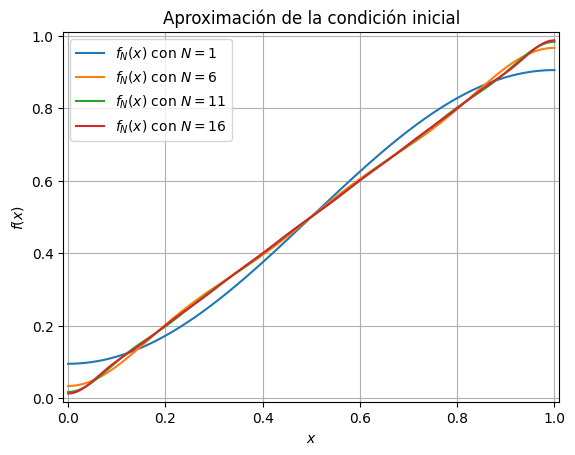

In [170]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

In [171]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += ((2)*((-1)**n)-1)*cos(n*pi*x)*exp(-n**2*pi**2*t[i])/((n*pi)**2)
    return f + 1/2

In [172]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

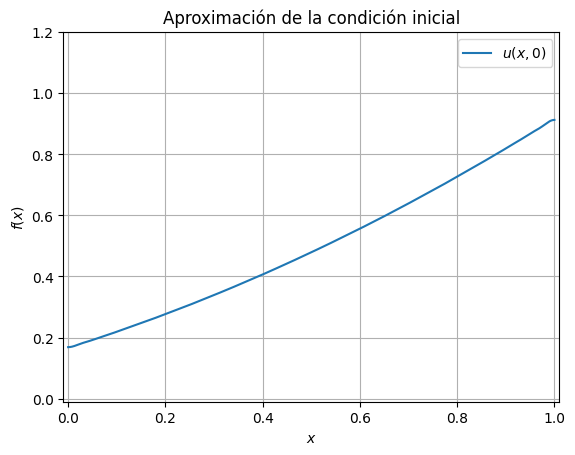

In [173]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

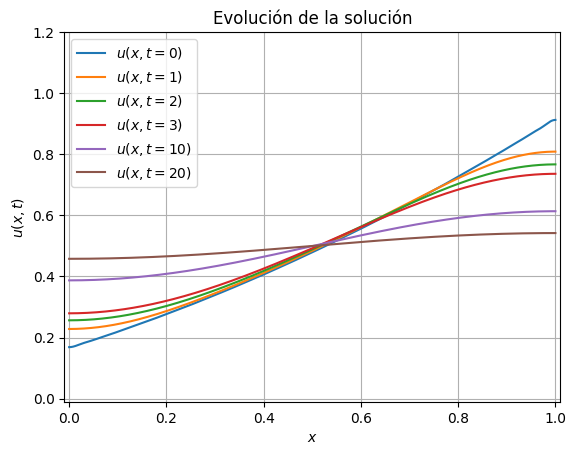

In [174]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

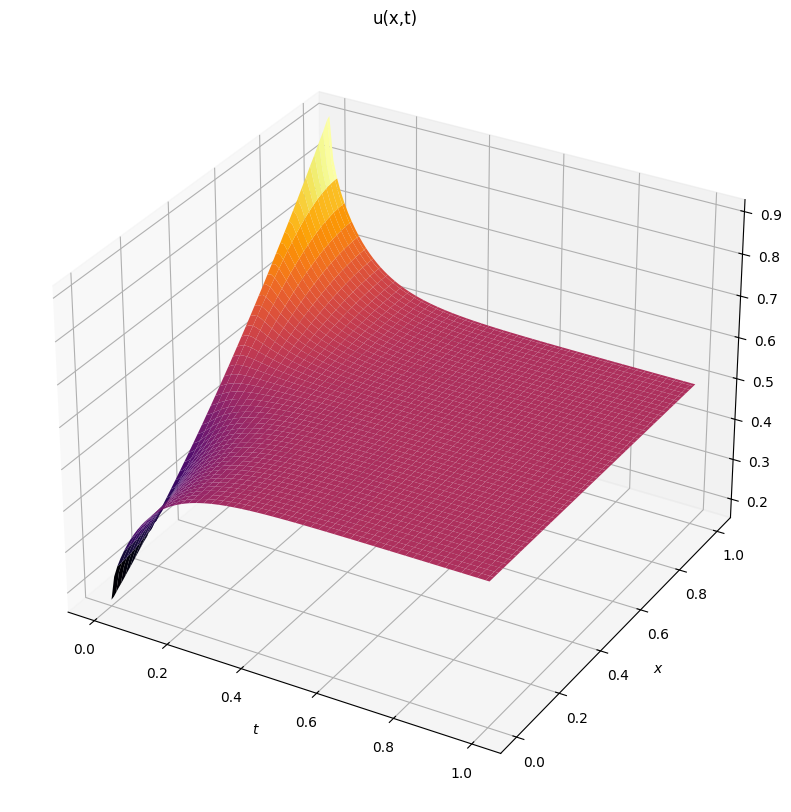

In [175]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"